In [6]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, PrecisionRecallDisplay, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from itertools import cycle
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
import lightgbm as lgb
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from sklearn.utils import shuffle
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import label_binarize
from io import BytesIO
from zipfile import ZipFile
import zipfile

In [7]:
zip_file_path = 'Dutch_data_processed_onehot.zip'
csv_file_inside_zip = 'Dutch_data_processed_onehot.csv'

In [8]:
with ZipFile(zip_file_path, 'r') as zip_file:
    with zip_file.open(csv_file_inside_zip) as csv_file:
        df = pd.read_csv(csv_file)

In [9]:
warnings.filterwarnings("ignore")

In [10]:
df

,People_in_house,Gender,Age,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Year,Month,Weekday,...,Motive_Social and recreational,Motive_Tours/hiking,Motive_Visits,Household_composition_Couple,Household_composition_Couple and kids,Household_composition_One person household,Household_composition_Other,Education_Higher education,Education_Other,Education_Secondary
0,1,1,42,1,1,0,0,2018,1,6,...,0,0,0,0,0,1,0,0,0,1
1,1,1,42,1,1,0,0,2018,1,6,...,0,0,0,0,0,1,0,0,0,1
2,1,1,42,1,1,0,0,2018,1,6,...,0,0,1,0,0,1,0,0,0,1
3,1,1,42,1,1,0,0,2018,1,6,...,0,0,1,0,0,1,0,0,0,1
4,2,1,42,1,1,0,0,2018,1,5,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692050,3,0,49,1,1,0,0,2022,12,4,...,0,0,0,0,0,0,1,1,0,0
692051,3,0,49,1,1,0,0,2022,12,4,...,0,0,0,0,0,0,1,1,0,0
692052,3,0,49,1,1,0,0,2022,12,4,...,0,0,0,0,0,0,1,1,0,0
692053,3,0,49,1,1,0,0,2022,12,4,...,1,0,0,0,0,0,1,1,0,0


In [6]:
drops = ["Mode"]
X = df.drop(drops, axis=1)

<Axes: >

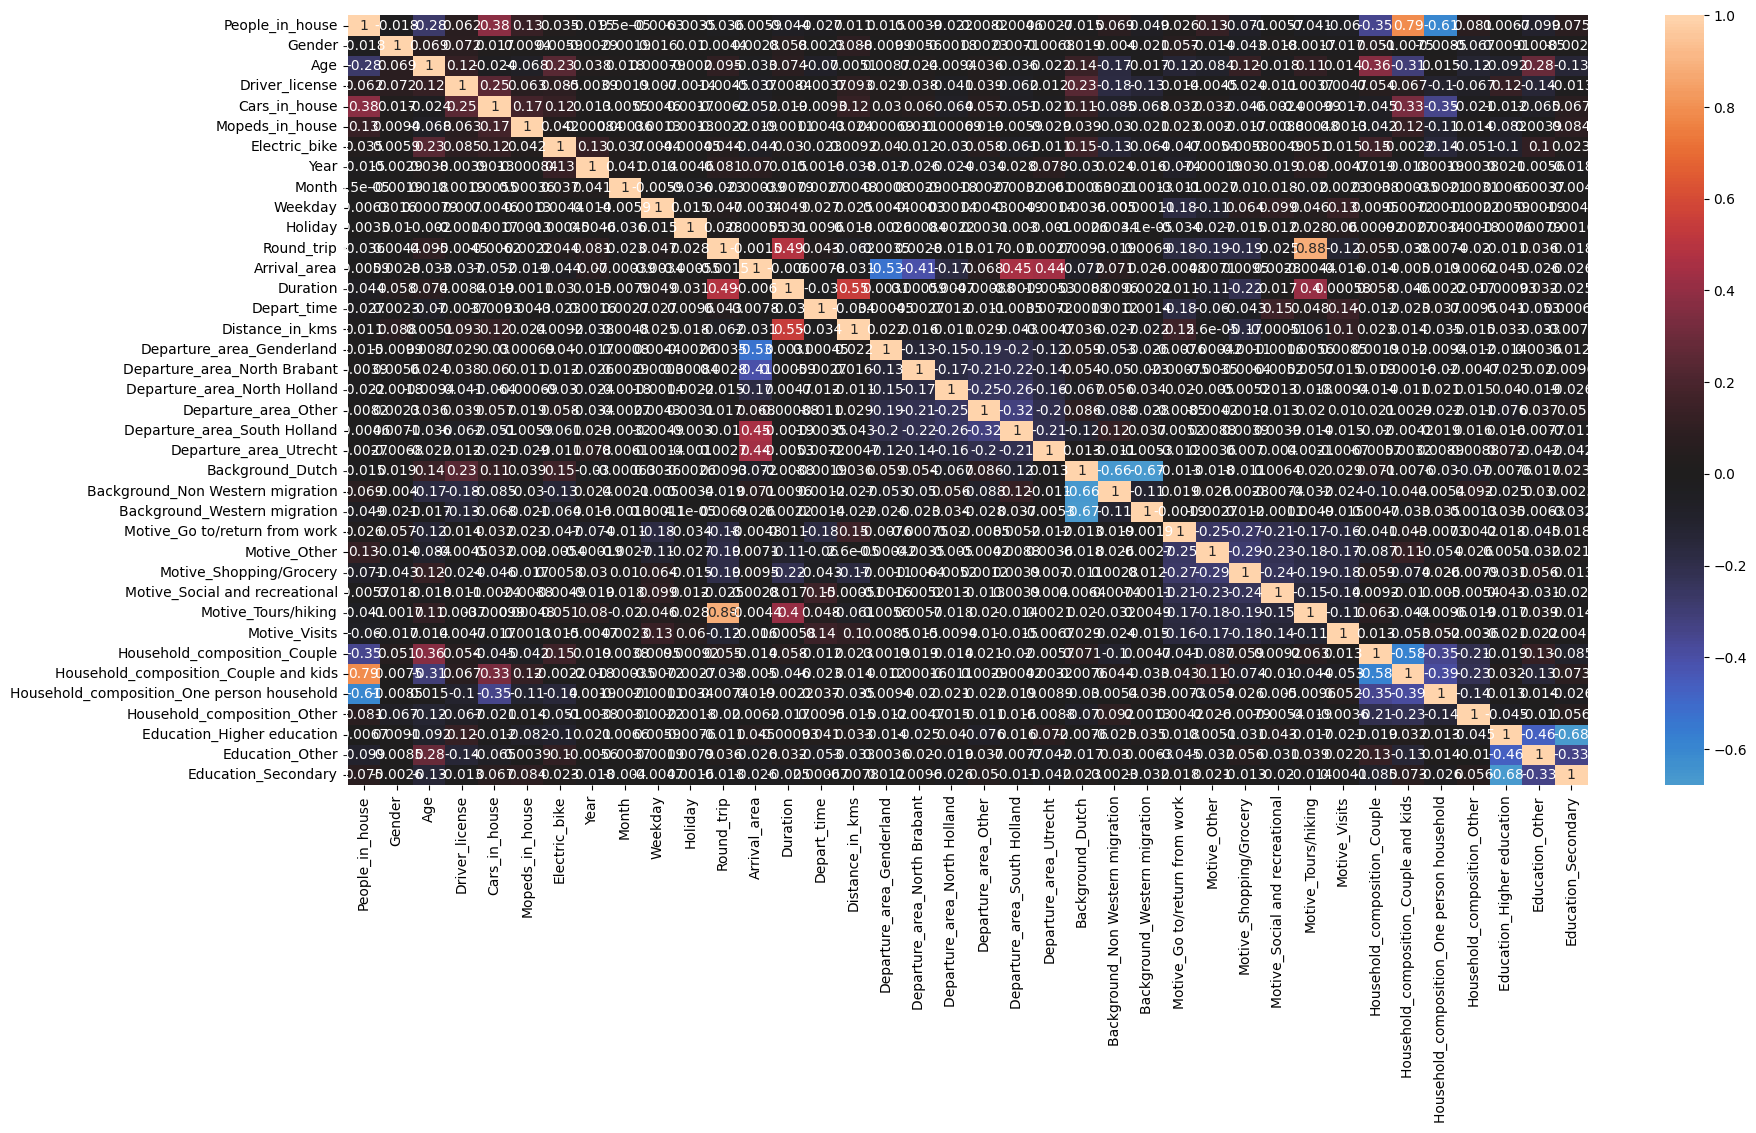

In [7]:
corrMatrix = X.corr()
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corrMatrix, annot=True, center=0, ax=ax)

# 4 labels: Car, Bike, Walk, Public Trasport

In [11]:
drops = ["Mode", "Arrival_area", "Year"]
X = df.drop(drops, axis=1)
y = df["Mode"]

In [12]:
X

,People_in_house,Gender,Age,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Month,Weekday,Holiday,...,Motive_Social and recreational,Motive_Tours/hiking,Motive_Visits,Household_composition_Couple,Household_composition_Couple and kids,Household_composition_One person household,Household_composition_Other,Education_Higher education,Education_Other,Education_Secondary
0,1,1,42,1,1,0,0,1,6,0,...,0,0,0,0,0,1,0,0,0,1
1,1,1,42,1,1,0,0,1,6,0,...,0,0,0,0,0,1,0,0,0,1
2,1,1,42,1,1,0,0,1,6,0,...,0,0,1,0,0,1,0,0,0,1
3,1,1,42,1,1,0,0,1,6,0,...,0,0,1,0,0,1,0,0,0,1
4,2,1,42,1,1,0,0,1,5,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692050,3,0,49,1,1,0,0,12,4,0,...,0,0,0,0,0,0,1,1,0,0
692051,3,0,49,1,1,0,0,12,4,0,...,0,0,0,0,0,0,1,1,0,0
692052,3,0,49,1,1,0,0,12,4,0,...,0,0,0,0,0,0,1,1,0,0
692053,3,0,49,1,1,0,0,12,4,0,...,1,0,0,0,0,0,1,1,0,0


In [13]:
X, y = shuffle(X, y, random_state=42)

In [14]:
X

,People_in_house,Gender,Age,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Month,Weekday,Holiday,...,Motive_Social and recreational,Motive_Tours/hiking,Motive_Visits,Household_composition_Couple,Household_composition_Couple and kids,Household_composition_One person household,Household_composition_Other,Education_Higher education,Education_Other,Education_Secondary
450271,2,0,59,1,1,0,1,5,3,0,...,0,0,0,1,0,0,0,1,0,0
28807,2,1,82,1,1,0,0,4,2,0,...,0,0,1,1,0,0,0,0,1,0
74133,3,1,55,1,3,1,0,6,4,0,...,0,0,0,0,1,0,0,0,0,1
343899,2,0,62,1,1,0,0,8,1,0,...,0,0,0,1,0,0,0,1,0,0
655809,5,1,51,1,2,0,0,5,6,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,2,1,53,1,2,0,1,12,1,0,...,1,0,0,1,0,0,0,1,0,0
365838,2,1,42,1,0,0,0,9,4,0,...,0,0,0,1,0,0,0,1,0,0
131932,2,0,64,1,0,0,0,12,2,0,...,0,0,0,1,0,0,0,0,0,1
671155,4,1,40,1,1,0,0,12,1,0,...,0,0,0,0,1,0,0,0,0,1


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42, stratify=y)

In [16]:
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

print("Class counts in y_train:")
print(y_train_series.value_counts())

print("\nClass counts in y_test:")
print(y_test_series.value_counts())

Class counts in y_train:
Mode
0    253675
1    141458
2    138822
3     19689
Name: count, dtype: int64

Class counts in y_test:
Mode
0    63419
1    35365
2    34705
3     4922
Name: count, dtype: int64


In [12]:
X_train.shape, X_test.shape

((553644, 36), (138411, 36))

# Logistic Regression

In [15]:
pipeline = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('sampler', SMOTE(random_state=42, sampling_strategy="auto")),
    ('classifier', LogisticRegression(random_state=42))
])

In [16]:
param_grid = {'classifier__C': [0.01, 0.1, 1, 10, 100],
              'classifier__solver': ['lbfgs', 'liblinear'],
              'classifier__max_iter': [100, 200, 300]}
grid_search_log = GridSearchCV(pipeline, param_grid, cv=10, scoring='f1_macro', n_jobs=-1)
grid_search_log.fit(X_train, y_train)
log_params = grid_search_log.best_params_
print(log_params)

KeyboardInterrupt: 

In [14]:
logreg_model = grid_search_log.best_estimator_
y_pred_log = logreg_model.predict(X_test)
Log_Report = classification_report(y_test, y_pred_log)
print('Log_Report:', Log_Report, sep='\n')

Log_Report:
              precision    recall  f1-score   support

           0       0.91      0.66      0.77     63419
           1       0.56      0.53      0.55     35365
           2       0.74      0.88      0.81     34705
           3       0.18      0.63      0.28      4922

    accuracy                           0.68    138411
   macro avg       0.60      0.68      0.60    138411
weighted avg       0.75      0.68      0.70    138411



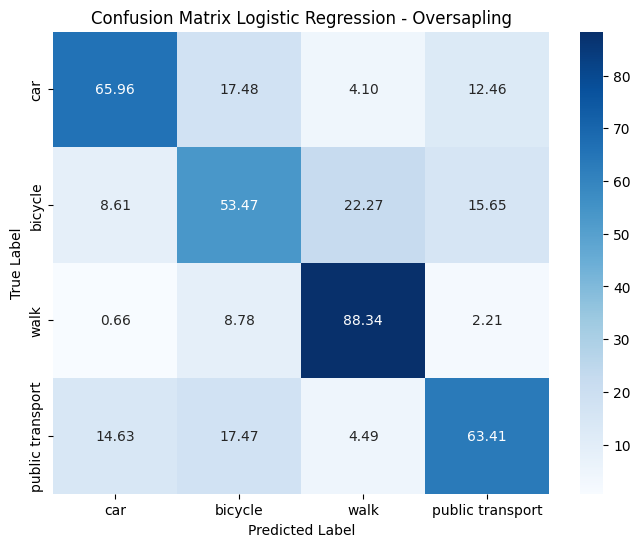

In [15]:
class_labels = ["car", "bicycle", "walk", "public transport"]
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_log) / conf_matrix_log.sum(axis=1)
conf_matrix_percentages_log = (conf_matrix_log.T / conf_matrix_log.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_log, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Logistic Regression - SMOTE')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [26]:
class_labels_mapping = {
    0: 'car',
    1: 'bike',
    2: 'walk',
    3: 'public transport'
}

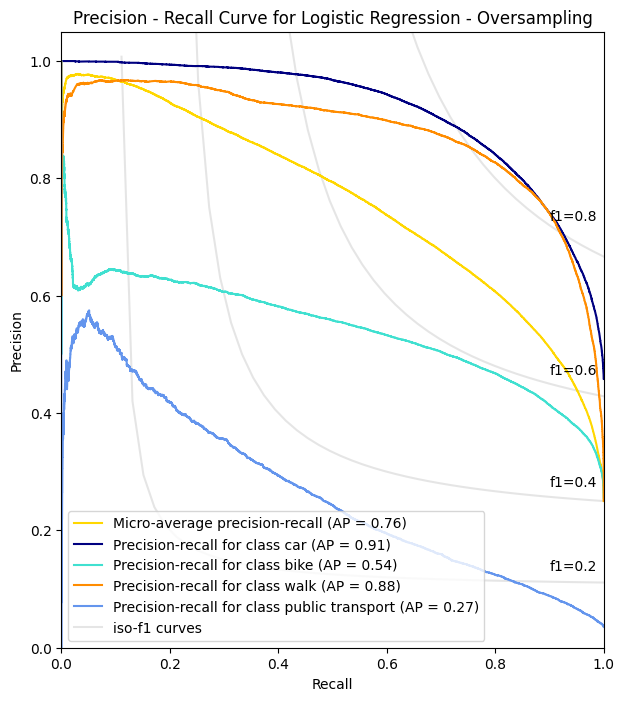

In [17]:
class_probabilities_log = logreg_model.predict_proba(X_test)
y_pred_prob_log = np.argmax(class_probabilities_log, axis=1)
y_test_bin_log = label_binarize(y_test, classes=logreg_model.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(logreg_model.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_log[:, i], class_probabilities_log[:, i])
    average_precision[i] = average_precision_score(y_test_bin_log[:, i], class_probabilities_log[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_log.ravel(), class_probabilities_log.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_log, class_probabilities_log, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for Logistic Regression - SMOTE")

plt.show()

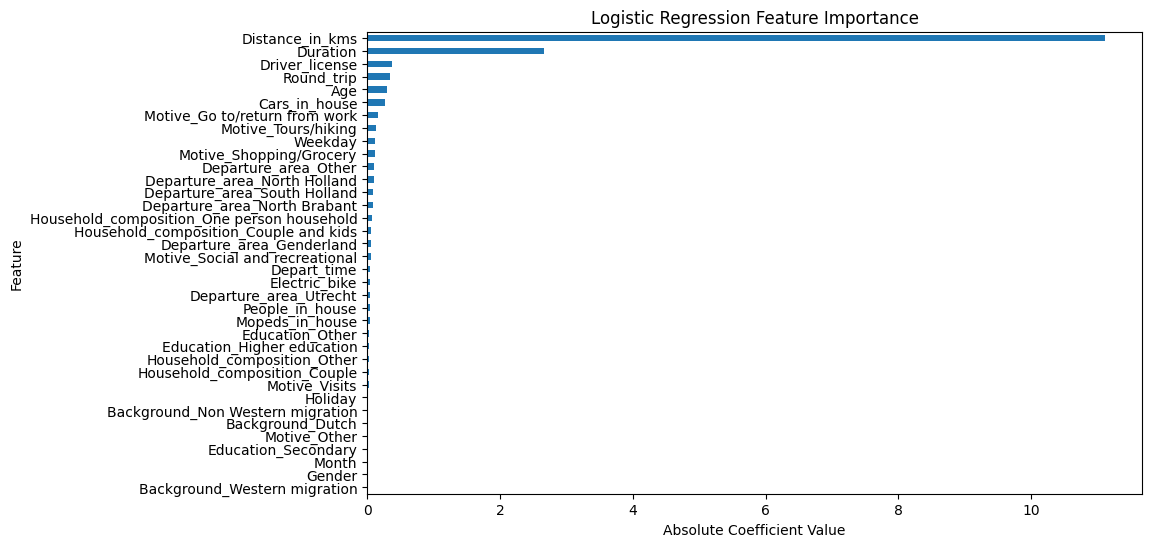

In [18]:
lclassifier = logreg_model.named_steps['classifier']
coefficients = pd.Series(lclassifier.coef_[0], index=X.columns)

sorted_coefficients = coefficients.abs().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
sorted_coefficients.plot(kind='barh')
plt.title('Logistic Regression Feature Importance')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [19]:
sorted_coefficients

Background_Western migration                   0.001162
Gender                                         0.004170
Month                                          0.004466
Education_Secondary                            0.007959
Motive_Other                                   0.012233
Background_Dutch                               0.013907
Background_Non Western migration               0.017451
Holiday                                        0.017596
Motive_Visits                                  0.022761
Household_composition_Couple                   0.024194
Household_composition_Other                    0.028006
Education_Higher education                     0.034871
Education_Other                                0.035198
Mopeds_in_house                                0.037273
People_in_house                                0.039976
Departure_area_Utrecht                         0.046006
Electric_bike                                  0.047999
Depart_time                                    0

# Decision Tree

In [13]:
pipeline = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('sampler', SMOTE(random_state=42, sampling_strategy="auto")),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [14]:
param_grid = {
    'classifier__max_depth': list(range(2, 21)),
}

In [15]:
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring="f1_macro", n_jobs=-1)

In [16]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('sampler', SMOTE(random_state=42)),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                   11, 12, 13, 14, 15, 16, 17,
                                                   18, 19, 20]},
             scoring='f1_macro')

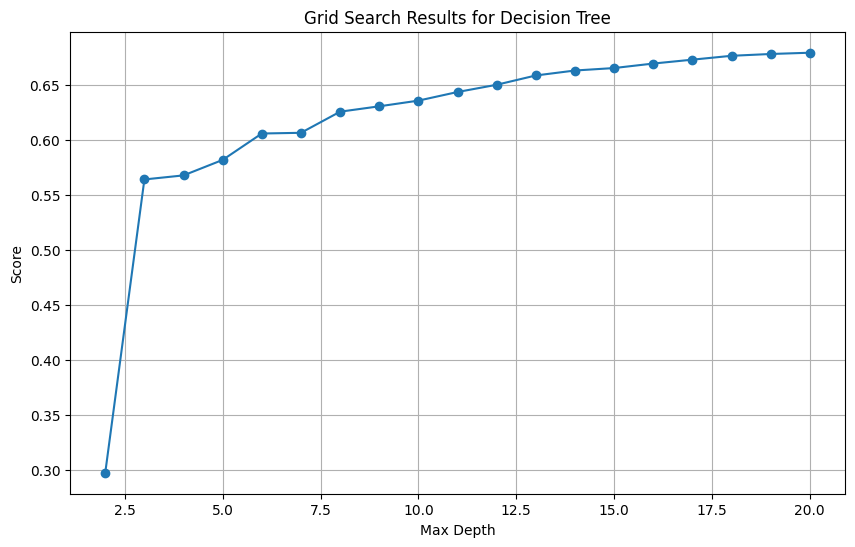

In [17]:
results = grid_search.cv_results_
max_depth_values = results['param_classifier__max_depth'].data
mean_accuracy = results['mean_test_score']
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mean_accuracy, marker='o')
plt.title('Grid Search Results for Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [18]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [19]:
best_params

{'classifier__max_depth': 20}

In [20]:
y_pred = best_model.predict(X_test)
tree_report_test = classification_report(y_test, y_pred)
print(tree_report_test, sep='\n')

              precision    recall  f1-score   support

           0       0.87      0.80      0.84     63419
           1       0.62      0.69      0.65     35365
           2       0.85      0.83      0.84     34705
           3       0.35      0.49      0.40      4922

    accuracy                           0.77    138411
   macro avg       0.67      0.70      0.68    138411
weighted avg       0.78      0.77      0.77    138411



In [21]:
X.columns

Index(['People_in_house', 'Gender', 'Age', 'Driver_license', 'Cars_in_house',
       'Mopeds_in_house', 'Electric_bike', 'Month', 'Weekday', 'Holiday',
       'Round_trip', 'Duration', 'Depart_time', 'Distance_in_kms',
       'Departure_area_Genderland', 'Departure_area_North Brabant',
       'Departure_area_North Holland', 'Departure_area_Other',
       'Departure_area_South Holland', 'Departure_area_Utrecht',
       'Background_Dutch', 'Background_Non Western migration',
       'Background_Western migration', 'Motive_Go to/return from work',
       'Motive_Other', 'Motive_Shopping/Grocery',
       'Motive_Social and recreational', 'Motive_Tours/hiking',
       'Motive_Visits', 'Household_composition_Couple',
       'Household_composition_Couple and kids',
       'Household_composition_One person household',
       'Household_composition_Other', 'Education_Higher education',
       'Education_Other', 'Education_Secondary'],
      dtype='object')

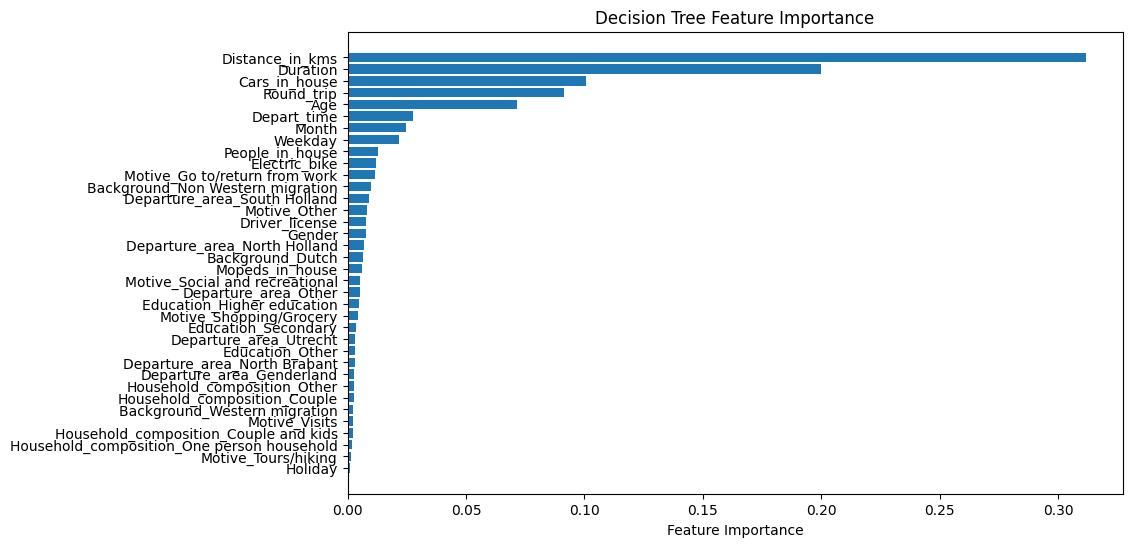

In [22]:
decision_tree_classifier = best_model.named_steps['classifier']

feature_importances = decision_tree_classifier.feature_importances_

feature_names = ['People_in_house', 'Gender', 'Age', 'Driver_license', 'Cars_in_house',
       'Mopeds_in_house', 'Electric_bike', 'Month', 'Weekday', 'Holiday',
       'Round_trip', 'Duration', 'Depart_time', 'Distance_in_kms',
       'Departure_area_Genderland', 'Departure_area_North Brabant',
       'Departure_area_North Holland', 'Departure_area_Other',
       'Departure_area_South Holland', 'Departure_area_Utrecht',
       'Background_Dutch', 'Background_Non Western migration',
       'Background_Western migration', 'Motive_Go to/return from work',
       'Motive_Other', 'Motive_Shopping/Grocery',
       'Motive_Social and recreational', 'Motive_Tours/hiking',
       'Motive_Visits', 'Household_composition_Couple',
       'Household_composition_Couple and kids',
       'Household_composition_One person household',
       'Household_composition_Other', 'Education_Higher education',
       'Education_Other', 'Education_Secondary']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importance")
plt.show()

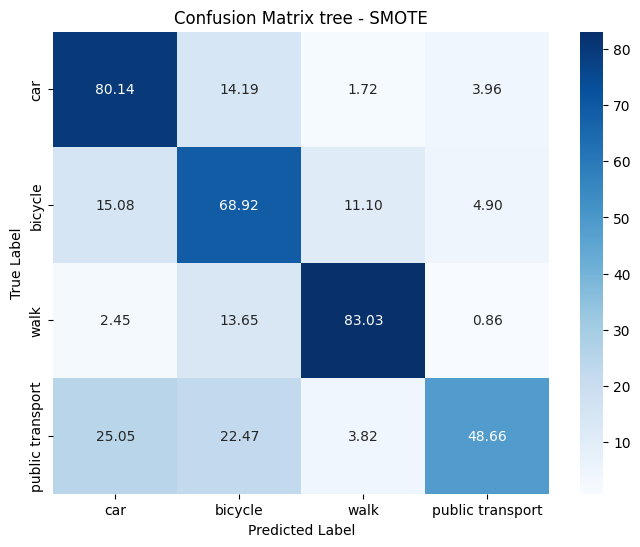

In [24]:
class_labels = ["car", "bicycle", "walk", "public transport"]
conf_matrix_dt = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_dt) / conf_matrix_dt.sum(axis=1)
conf_matrix_percentages_dt = (conf_matrix_dt.T / conf_matrix_dt.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_dt, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix tree - SMOTE')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [25]:
class_labels_mapping = {
    0: 'car',
    1: 'bike',
    2: 'walk',
    3: 'public transport'
}

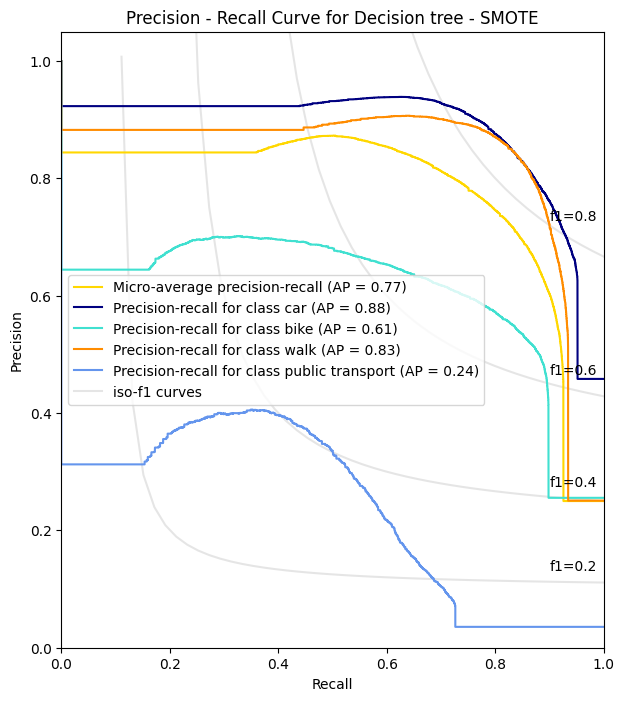

In [26]:
class_probabilities_tree = best_model.predict_proba(X_test)
y_pred_prob_tree = np.argmax(class_probabilities_tree, axis=1)
y_test_bin_tree = label_binarize(y_test, classes=best_model.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(best_model.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_tree[:, i], class_probabilities_tree[:, i])
    average_precision[i] = average_precision_score(y_test_bin_tree[:, i], class_probabilities_tree[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_tree.ravel(), class_probabilities_tree.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_tree, class_probabilities_tree, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for Decision tree - SMOTE")

plt.show()

# Random Forest

In [13]:
X.shape

(692055, 36)

In [17]:
pipeline = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('sampler', SMOTE(random_state=42, sampling_strategy = "auto")),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [18]:
param_grid = {
    'classifier__max_features' : list(range(2, 21))
}
grid_search_rf = GridSearchCV(pipeline, param_grid, cv=10, scoring='f1_macro', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('sampler', SMOTE(random_state=42)),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_features': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20]},
             scoring='f1_macro')

In [19]:
best_params = grid_search_rf.best_params_
print(best_params)

{'classifier__max_features': 6}


In [ ]:
param_grid = {
    'classifier__n_estimators' : [650],
    'classifier__max_features' : [5]
}
grid_search_rf = GridSearchCV(pipeline, param_grid, cv=10, scoring='f1_macro', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

In [21]:
best_model = grid_search_rf.best_estimator_
y_pred = best_model.predict(X_test)
tree_report_test = classification_report(y_test, y_pred)
print(tree_report_test, sep='\n')

              precision    recall  f1-score   support

           0       0.93      0.90      0.92     63419
           1       0.79      0.81      0.80     35365
           2       0.88      0.92      0.90     34705
           3       0.66      0.57      0.61      4922

    accuracy                           0.87    138411
   macro avg       0.81      0.80      0.80    138411
weighted avg       0.87      0.87      0.87    138411



In [22]:
X.columns

Index(['People_in_house', 'Gender', 'Age', 'Driver_license', 'Cars_in_house',
       'Mopeds_in_house', 'Electric_bike', 'Month', 'Weekday', 'Holiday',
       'Round_trip', 'Duration', 'Depart_time', 'Distance_in_kms',
       'Departure_area_Genderland', 'Departure_area_North Brabant',
       'Departure_area_North Holland', 'Departure_area_Other',
       'Departure_area_South Holland', 'Departure_area_Utrecht',
       'Background_Dutch', 'Background_Non Western migration',
       'Background_Western migration', 'Motive_Go to/return from work',
       'Motive_Other', 'Motive_Shopping/Grocery',
       'Motive_Social and recreational', 'Motive_Tours/hiking',
       'Motive_Visits', 'Household_composition_Couple',
       'Household_composition_Couple and kids',
       'Household_composition_One person household',
       'Household_composition_Other', 'Education_Higher education',
       'Education_Other', 'Education_Secondary'],
      dtype='object')

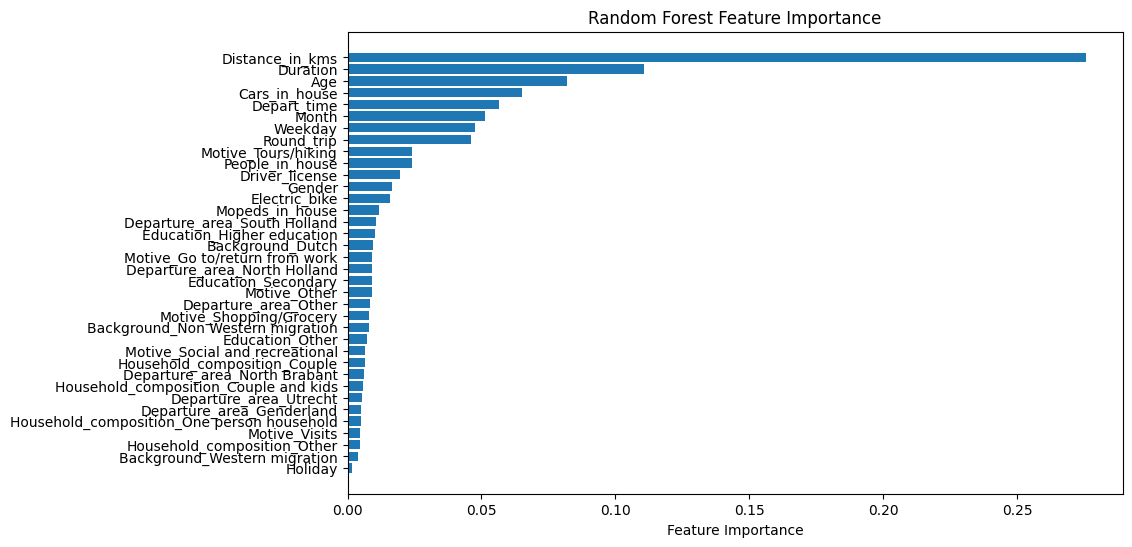

In [23]:
rf = best_model.named_steps['classifier']

feature_importances = rf.feature_importances_

feature_names = ['People_in_house', 'Gender', 'Age', 'Driver_license', 'Cars_in_house',
       'Mopeds_in_house', 'Electric_bike', 'Month', 'Weekday', 'Holiday',
       'Round_trip', 'Duration', 'Depart_time', 'Distance_in_kms',
       'Departure_area_Genderland', 'Departure_area_North Brabant',
       'Departure_area_North Holland', 'Departure_area_Other',
       'Departure_area_South Holland', 'Departure_area_Utrecht',
       'Background_Dutch', 'Background_Non Western migration',
       'Background_Western migration', 'Motive_Go to/return from work',
       'Motive_Other', 'Motive_Shopping/Grocery',
       'Motive_Social and recreational', 'Motive_Tours/hiking',
       'Motive_Visits', 'Household_composition_Couple',
       'Household_composition_Couple and kids',
       'Household_composition_One person household',
       'Household_composition_Other', 'Education_Higher education',
       'Education_Other', 'Education_Secondary']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

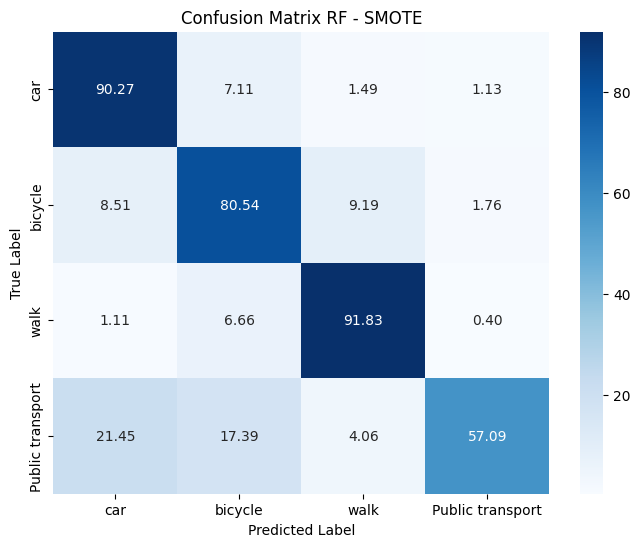

In [27]:
class_labels = ["car", "bicycle", "walk", "Public transport"]
conf_matrix_rf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_rf) / conf_matrix_rf.sum(axis=1)
conf_matrix_percentages_rf = (conf_matrix_rf.T / conf_matrix_rf.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_rf, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix RF - SMOTE')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

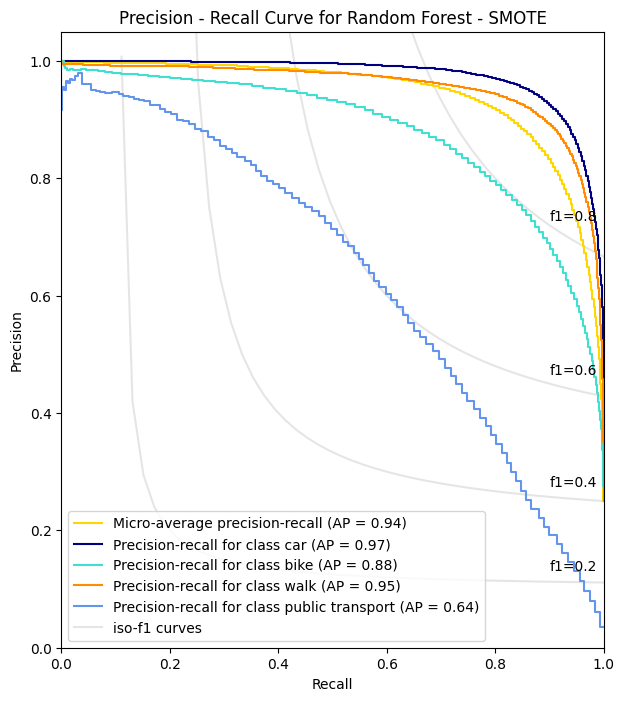

In [28]:
class_probabilities_rf = best_model.predict_proba(X_test)
y_pred_prob_rf = np.argmax(class_probabilities_rf, axis=1)
y_test_bin_rf = label_binarize(y_test, classes=best_model.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(best_model.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_rf[:, i], class_probabilities_rf[:, i])
    average_precision[i] = average_precision_score(y_test_bin_rf[:, i], class_probabilities_rf[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_rf.ravel(), class_probabilities_rf.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_rf, class_probabilities_rf, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for Random Forest - SMOTE")

plt.show()

# XGBoost

In [40]:
pipeline = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('sampler', RandomOverSampler(random_state=42, sampling_strategy = "auto")),
    ('classifier', xgb.XGBClassifier(objective='multi:softmax', num_class=4, random_state=42))
])

In [35]:
param_grid = {
    'classifier__colsample_bytree' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
}
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring="f1_macro", n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('sampler',
                                        RandomOverSampler(random_state=42)),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_ty...
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None, num_class=4,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'classifier__colsample_bytree': [0.1, 0.2, 0.3, 0.4,
                                                          0.5, 0.6, 0.7, 0.8,
                                                          0.9, 1]},
             scoring='f1_macro')

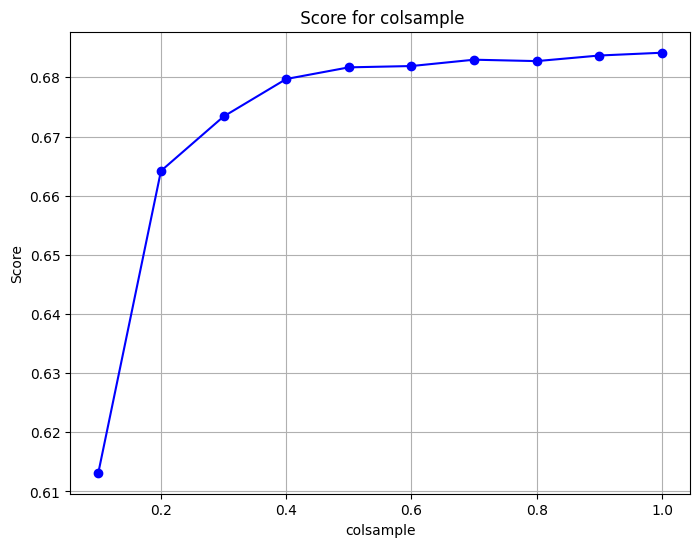

In [36]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['classifier__colsample_bytree']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for colsample')
plt.xlabel('colsample')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [37]:
param_grid = {
    'classifier__subsample' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
}
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring="f1_macro", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_xgb = grid_search.best_params_

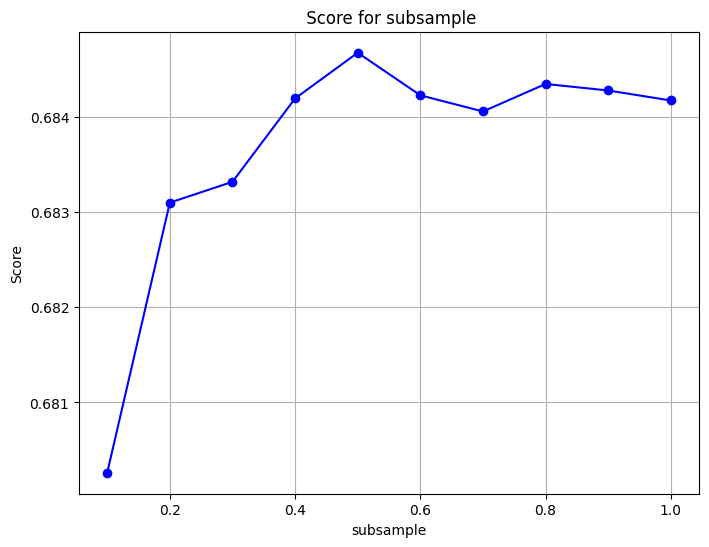

In [38]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['classifier__subsample']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for subsample')
plt.xlabel('subsample')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [41]:
param_grid = {
    'classifier__gamma': [0, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9, 1.0, 2.0]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring="f1_macro", n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('sampler',
                                        RandomOverSampler(random_state=42)),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_ty...
                                                      max_bin=None,
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None, num_class=4,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'classifier__gamma': [0, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9,
                                               1.0, 2.0]},
             scoring='f1_macro')

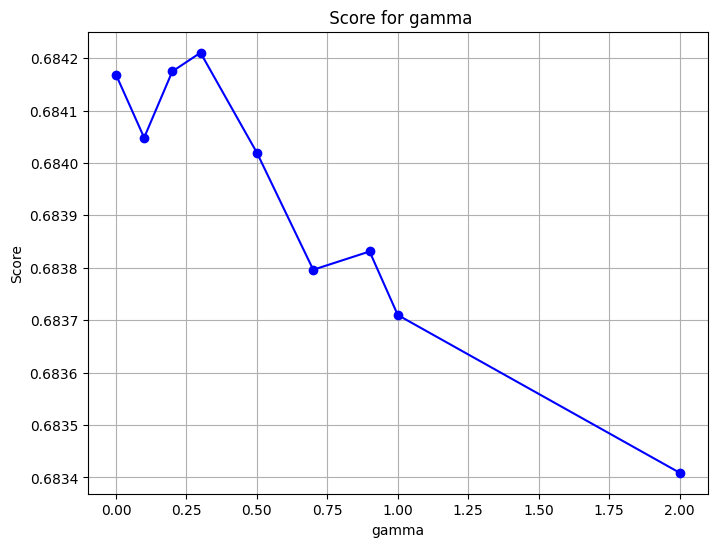

In [42]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['classifier__gamma']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for gamma')
plt.xlabel('gamma')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [43]:
param_grid = {
    'classifier__learning_rate' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
}
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring="f1_macro", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_xgb = grid_search.best_params_

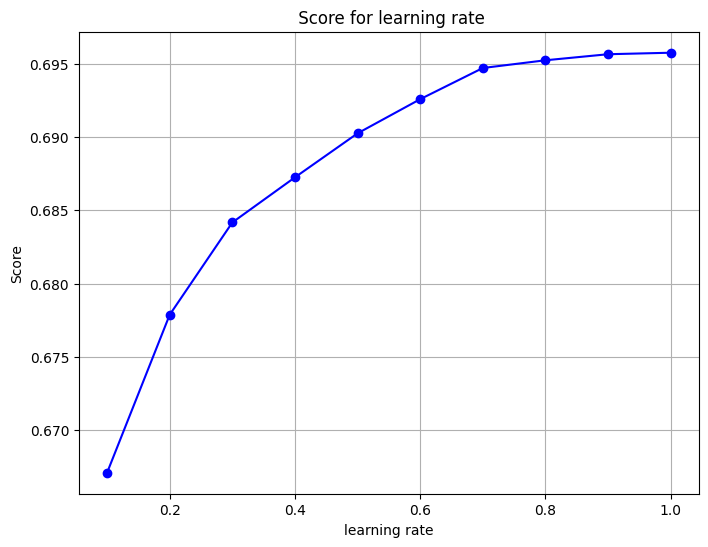

In [44]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['classifier__learning_rate']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for learning rate')
plt.xlabel('learning rate')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [45]:
param_grid = {
    'classifier__learning_rate' : [0.9, 1],
    'classifier__subsample' : [0.5], 
    'classifier__n_estimators' : [350, 450, 550],
    'classifier__gamma' : [0.2, 0.3],
    'classifier__colsample_bytree' : [0.9, 1]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring="f1_macro", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_xgb = grid_search.best_params_
print(best_params_xgb)

{'classifier__colsample_bytree': 1, 'classifier__gamma': 0.2, 'classifier__learning_rate': 0.9, 'classifier__n_estimators': 550, 'classifier__subsample': 0.5}


In [46]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
xgbreport = classification_report(y_test, y_pred)
print(xgbreport)

              precision    recall  f1-score   support

           0       0.91      0.81      0.86     63419
           1       0.65      0.73      0.69     35365
           2       0.84      0.86      0.85     34705
           3       0.45      0.60      0.51      4922

    accuracy                           0.79    138411
   macro avg       0.71      0.75      0.73    138411
weighted avg       0.81      0.79      0.80    138411



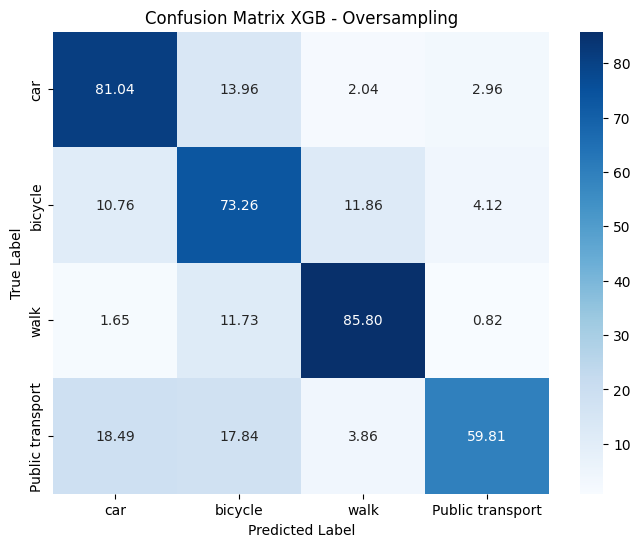

In [47]:
class_labels = ["car", "bicycle", "walk", "Public transport"]
conf_matrix_xgb = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_xgb) / conf_matrix_xgb.sum(axis=1)
conf_matrix_percentages_xgb = (conf_matrix_xgb.T / conf_matrix_xgb.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_xgb, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix XGB - Oversampling')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

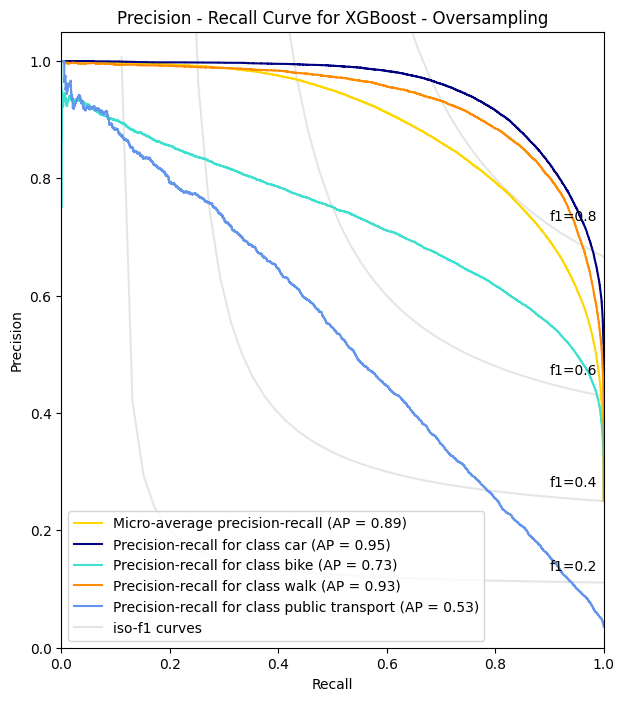

In [48]:
class_probabilities_xgb = best_model.predict_proba(X_test)
y_pred_prob_xgb = np.argmax(class_probabilities_xgb, axis=1)
y_test_bin_xgb = label_binarize(y_test, classes=best_model.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(best_model.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_xgb[:, i], class_probabilities_xgb[:, i])
    average_precision[i] = average_precision_score(y_test_bin_xgb[:, i], class_probabilities_xgb[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_xgb.ravel(), class_probabilities_xgb.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_xgb, class_probabilities_xgb, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for XGBoost - Oversampling")

plt.show()